In [ ]:
!pip install praat-parselmouth
!pip install tgt

In [ ]:
import parselmouth

**Задание для выполнения в классе**:
1. Используя команду "Insert interval tier", добавьте в конец нашего TextGrid (на позицию 5) новый уровень. Придумайте для него название.  
<img src="https://pkholyavin.github.io/mastersprogramming/add_interval_tier.png" width="500">

2. Используя команду "Insert boundary", разделите его на пять равных интервалов. Воспользуйтесь атрибутом `xmax` класса `TextGrid`, чтобы найти длину файла.  
<img src="https://pkholyavin.github.io/mastersprogramming/insert_boundary.png" width="500">

3. Используя команду "Set interval text", назовите каждый интервал буквой латинского алфавита от A до E.  
<img src="https://pkholyavin.github.io/mastersprogramming/set_interval_text.png" width="500">

In [ ]:
!wget https://pkholyavin.github.io/mastersprogramming/av1fpt1.TextGrid

In [29]:
tg = parselmouth.read("av1fpt1.TextGrid")
# tier_pos = 5
# более правильно:
tier_pos = parselmouth.praat.call(tg, "Get number of tiers") + 1
parselmouth.praat.call(tg, "Insert interval tier", tier_pos, "hello")
names = "ABCDE"
num_intervals = 5
for i in range(1, num_intervals):
    parselmouth.praat.call(tg, "Insert boundary", tier_pos, tg.xmax * i / num_intervals)
    parselmouth.praat.call(tg, "Set interval text", tier_pos, i, names[i - 1])
parselmouth.praat.call(tg, "Set interval text", tier_pos, num_intervals, names[num_intervals - 1])

In [31]:
tier = tg.to_tgt().get_tier_by_name("hello")
for interval in tier:
    print(interval)

Interval(0.0, 0.4015004669540231, "A")
Interval(0.4015004669540231, 0.8030009339080462, "B")
Interval(0.8030009339080462, 1.2045014008620691, "C")
Interval(1.2045014008620691, 1.6060018678160923, "D")
Interval(1.6060018678160923, 2.0075023347701153, "E")


In [ ]:
tg.save("result.TextGrid")

**Задание для выполнения в классе**: напишите программу, которая получает информацию о всех точках в PitchTier'е и строит график зависимости ЧОТ от времени. Для этого сделайте два списка, каждый длиной num_points, в одном из которых будут значения времени, а во втором &ndash; значения ЧОТ.

In [ ]:
!wget https://pkholyavin.github.io/mastersprogramming/cta0001.wav

In [2]:
import matplotlib.pyplot as plt

In [3]:
sound = parselmouth.Sound("cta0001.wav")
step, min_f0, max_f0 = 0.01, 75, 350  # s, Hz, Hz
manip = parselmouth.praat.call(sound, "To Manipulation", step, min_f0, max_f0)
pitch_tier = parselmouth.praat.call(manip, "Extract pitch tier")

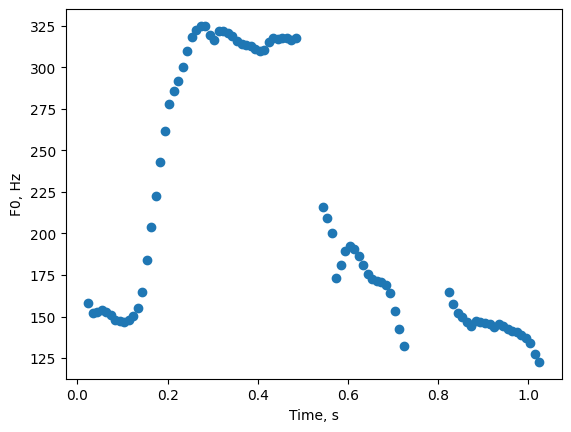

In [4]:
num_points = parselmouth.praat.call(pitch_tier, "Get number of points")
time_values = []
f0_values = []
for i in range(1, num_points + 1):
    time_values.append(parselmouth.praat.call(pitch_tier, "Get time from index", i))
    f0_values.append(parselmouth.praat.call(pitch_tier, "Get value at index", i))

# нарисуем график отдельными точками
plt.plot(time_values, f0_values, linestyle="", marker="o")
plt.xlabel("Time, s")
plt.ylabel("F0, Hz")
plt.show()

**Задание для выполнения в классе**: похулиганим! Создайте копию изначального PitchTier'а, где значение каждой точки будет случайным (от минимального до максимального в изначальном PitchTier'е) и синтезируйте звук.

In [10]:
import random

In [8]:
start_time = sound.xmin
end_time = sound.xmax

new_pitch_tier = parselmouth.praat.call("Create PitchTier", "new_pitch_tier", start_time, end_time)

In [9]:
min_f0, max_f0 = min(f0_values), max(f0_values)

In [11]:
for i in range(1, num_points + 1):
    t = parselmouth.praat.call(pitch_tier, "Get time from index", i)
    parselmouth.praat.call(new_pitch_tier, "Add point", t, random.uniform(min_f0, max_f0))

In [12]:
parselmouth.praat.call([manip, new_pitch_tier], "Replace pitch tier")
random_sound = parselmouth.praat.call(manip, "Get resynthesis (overlap-add)")

In [ ]:
from IPython.display import Audio
Audio(random_sound.values, rate=random_sound.sampling_frequency)

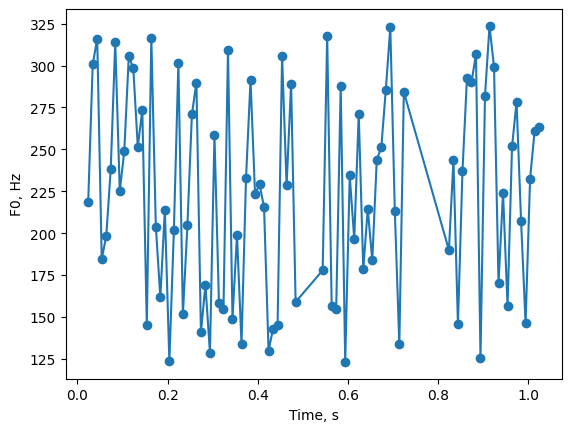

In [16]:
x = []
y = []
for i in range(1, num_points + 1):
    x.append(parselmouth.praat.call(new_pitch_tier, "Get time from index", i))
    y.append(parselmouth.praat.call(new_pitch_tier, "Get value at index", i))

plt.plot(x, y, linestyle="-", marker="o")
plt.xlabel("Time, s")
plt.ylabel("F0, Hz")
plt.show()